<a href="https://colab.research.google.com/github/ManavMoitra/REGRESSION_IMPLEMENTATION/blob/main/MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
pd.__version__

'1.1.5'

In [4]:
df=pd.read_csv('/content/advertising.csv')

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


VISUALISING THE DATA



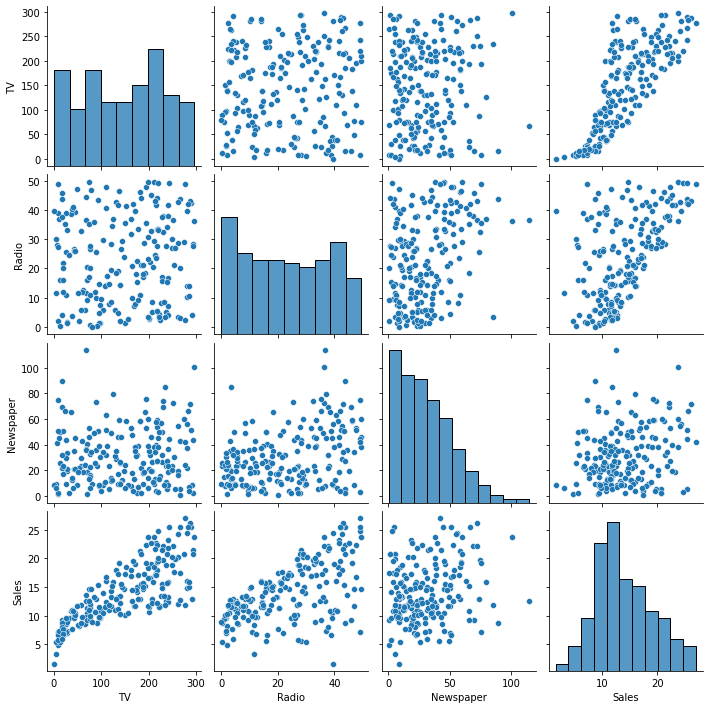

In [8]:
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


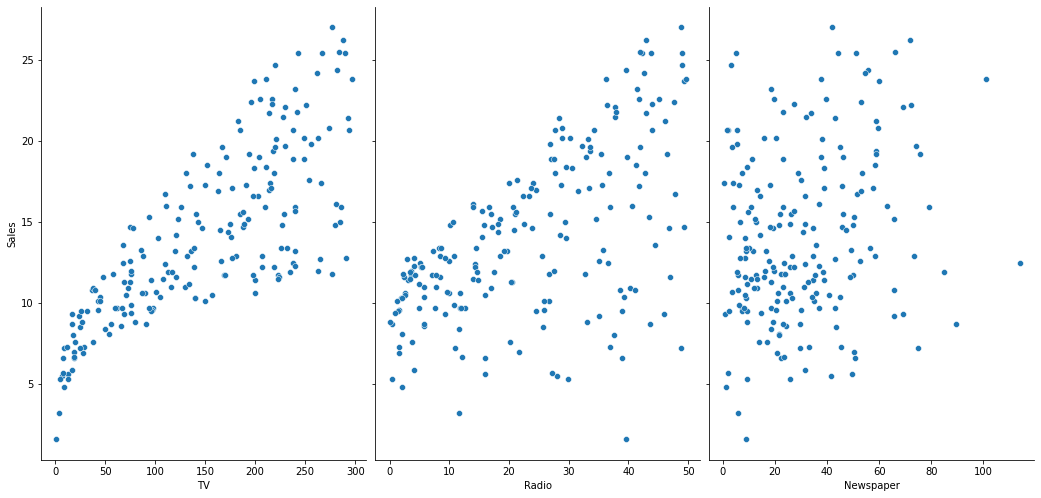

In [9]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7)

In [10]:
cor=df.corr()
round(cor,3)

,TV,Radio,Newspaper,Sales
TV,1.000,0.055,0.057,0.782
Radio,0.055,1.000,0.354,0.576
Newspaper,0.057,0.354,1.000,0.228
Sales,0.782,0.576,0.228,1.000


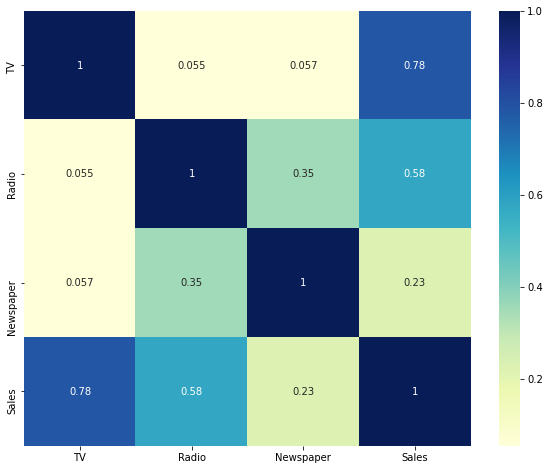

In [11]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [12]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
print(X_train.shape)
print(y_train.shape)

(140, 3)
(140,)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(lr.intercept_)

2.652789668879496


In [19]:
coef_df=pd.DataFrame(lr.coef_,X_test.columns,columns=['COEFFICIENT'])
coef_df.head()

,COEFFICIENT
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [20]:
y_pred=lr.predict(X_test)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error

In [22]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [23]:
print("R_square_error ",r2)
print("Mean_Squared_error",mse)

R_square_error  0.9058622107532245
Mean_Squared_error 1.8506819941636972


In [24]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
X_train_sm=X_train
X_train_sm=sm.add_constant(X_train)
lm1=sm.OLS(y_train,X_train_sm).fit()
lm1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [26]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           9.97e-66
Time:                        06:01:27   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.000       1.893       3.412
TV             0.0454      0.002     27.093      0.000       0.042       0.049
Radio          0.1898      0.011     17.009      0.000       0.168       0.212
Newspaper      0.0046      0.008      0.613      0.541      -0.010       0.019
==============================================================================
Omnibus:                       40.095   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.622
Skew:                          -1.233   Prob(JB):                     6.94e-19
Kurtosis:                       5.873   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X_train_new=X_train[['TV','Radio']]


In [28]:
X_test_new=X_test[['TV','Radio']]

In [29]:
lr.fit(X_train_new,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred_new=lr.predict(X_test_new)

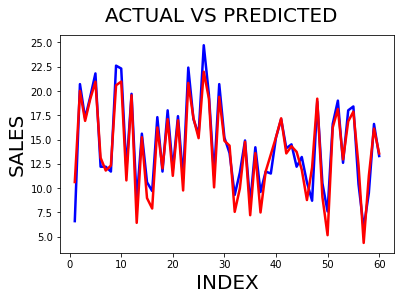

In [35]:
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred,color='red',linewidth=2.5,linestyle='-')
fig.suptitle("ACTUAL VS PREDICTED",fontsize=20)
plt.xlabel('INDEX',fontsize=20)
plt.ylabel('SALES',fontsize=20)
plt.show()

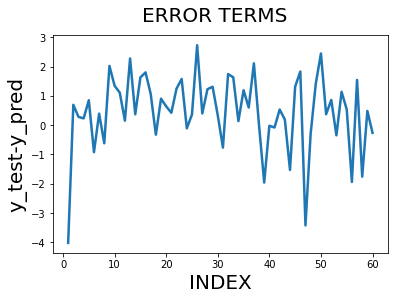

In [36]:
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,linewidth=2.5,linestyle='-')
plt.suptitle("ERROR TERMS",fontsize=20)
plt.xlabel("INDEX",fontsize=20)
plt.ylabel("y_test-y_pred",fontsize=20)
plt.show()

In [37]:
print("r2 score is ",r2_score(y_test,y_pred_new))
print("mean squared error is ",mean_squared_error(y_test,y_pred_new))

r2 score is  0.9092164491718219
mean squared error is  1.7847400520902814


AGAIN CALCULATING THE VALUE OF p USING STATSMODEL

In [40]:
X_train_final=X_train_new
X_train_final=sm.add_constant(X_train_final)
lr2=sm.OLS(y_train,X_train_final).fit()
print(lr2.params)

const    2.719040
TV       0.045533
Radio    0.192488
dtype: float64


In [41]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           4.46e-67
Time:                        06:24:17   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0